### 판다스를 활용한 데이터 전처리 연습

- 이 문제를 풀 때 다른 자료를 참고하거나, 구글 검색을 먼저 활용해보시기 바랍니다.   

In [1]:
# 관련 모듈 import 하기
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
# 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 
# 데이터를 분석할 때 출력해서 확인하기 편함
pd.options.display.max_columns = 100

### 데이터 로딩하기

- 데이터를 읽어올때는 [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) 라는 기능을 사용

- 여기서 파일의 경로를 지정하는 방법에 주의해야 함. 
    - read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것임
    

**차주정보.csv**

- 자료출처 
- 금융데이터 허브(https://www.bigdata-finance.kr/dataset/datasetView.do?datastId=SET1400010)에서 수집
    - ```차주정보.csv``` 
        - 신용정보원 일반신용정보DB에 등록된 개인(이하 차주)에 대한 인구통계 관련 정보를 제공
        - 컬럼 정보
            - 차주 일련번호 : 차주정보와 대출,연체,카드 개설정보를 결합하기 위한 key
            - 생년 : 차주 출생년도
                - 샘플링 시점 80세 이상은 '80세의 생년'으로 묶음
                - 샘플링 시점 19세 이하는 '19세의 생년'으로 묶음)
            - 성별 : 1.남성, 2: 여성


In [43]:
# 데이터 읽어오기
raw_data = pd.read_csv('./data/차주정보.csv')
raw_data.head()

,strd_yymm,deto_id,bth_yr,sex_cd
0,202010,X0010254691714933659,1990,1
1,202010,X0013455316779233219,1954,2
2,202010,X0019385710745765957,1977,1
3,202010,X0019442830801994941,1992,1
4,202010,X0032015350750301834,1968,1


1. raw_data 변수에 할당된 데이터의 행렬 사이즈를 출력하시오
    - 출력은 (row, column) 으로 표시됩니다

In [7]:
raw_data.shape

(50, 4)

2. raw_data의 처음과 마지막 5행씩을 출력하시오

In [8]:
raw_data.head()
raw_data.tail()

,strd_yymm,deto_id,bth_yr,sex_cd
0,202010,X0010254691714933659,1990,1
1,202010,X0013455316779233219,1954,2
2,202010,X0019385710745765957,1977,1
3,202010,X0019442830801994941,1992,1
4,202010,X0032015350750301834,1968,1


,strd_yymm,deto_id,bth_yr,sex_cd
45,202010,X0456268139651732219,1950,2
46,202010,X0471166329698944221,1956,1
47,202010,X0472554518406992051,1982,2
48,202010,X0473756250702972881,1958,2
49,202010,X0474444465014724107,1967,1


3. raw_data의 컬럼명과 index 명을 확인하시오.

In [19]:
raw_data.columns
raw_data.index

Index(['strd_yymm', 'deto_id', 'bth_yr', 'sex_cd'], dtype='object')

RangeIndex(start=0, stop=50, step=1)

4. 1번에서 확인한 컬럼명을 아래와 같이 수정하고 데이터를 출력하여 수정된사항을 확인하시오
- strd_yymm : 수집년월
- deto_id : 사용자ID
- bth_yr : 생년

In [44]:
raw_data = raw_data.rename(columns={'strd_yymm' : '수집년월',
                'deto_id' : '사용자ID',
                'bth_yr' : '생년'})

In [22]:
raw_data

,수집년월,사용자ID,생년,sex_cd
0,202010,X0010254691714933659,1990,1
1,202010,X0013455316779233219,1954,2
2,202010,X0019385710745765957,1977,1
3,202010,X0019442830801994941,1992,1
4,202010,X0032015350750301834,1968,1
5,202010,X0040437714409076855,1961,2
6,202010,X0060546064543865767,1994,1
7,202010,X0080319379158089172,1985,1
8,202010,X0088676443599868338,1999,2
9,202010,X0113312418671928134,1998,1


5. 3번에서 확인한 인덱스를 1부터 50 까지의 정수로 수정하고 데이터를 출력하여 확인하시오


In [48]:
data = []
for i in range(50) :
    data.append(i+1)

raw_data.index = data

50

In [49]:
raw_data.head()
raw_data.tail()

,수집년월,사용자ID,생년,sex_cd
1,202010,X0010254691714933659,1990,1
2,202010,X0013455316779233219,1954,2
3,202010,X0019385710745765957,1977,1
4,202010,X0019442830801994941,1992,1
5,202010,X0032015350750301834,1968,1


,수집년월,사용자ID,생년,sex_cd
46,202010,X0456268139651732219,1950,2
47,202010,X0471166329698944221,1956,1
48,202010,X0472554518406992051,1982,2
49,202010,X0473756250702972881,1958,2
50,202010,X0474444465014724107,1967,1


6. 출생년도를 4개의 카테고리로 분류하여 연령대 필드를 생성하시오. 
- (청년(19에서 29세); 중년(30에서 49세); 장년(50에서 64세); 노년(65세 이상))
- 2020년 나이를 기준으로 경계(bins)는 직접 설정 하시오

In [52]:
raw_data['생년'].min()
raw_data['생년'].max()

1939

1999

In [57]:
# 19 - 30 - 50 - 65
# 2001 1990 1970 1955 
data = raw_data['생년']

# 구간 경계값
# 구간 최소값 < 구간 <= 구간 최대값
bins=[1938,1955,1970,1990,1999]

# 각 구간의 이름 : labels - 카테고리명
# 순서는 구간(bins)의 순서와 동일해야 함
labels = ['노년','장년','중년','청년']

In [58]:
# len(data)
age = pd.cut(data,bins,labels=labels)
age

1     중년
2     노년
3     중년
4     청년
5     장년
6     장년
7     청년
8     중년
9     청년
10    청년
11    장년
12    장년
13    중년
14    청년
15    중년
16    장년
17    중년
18    장년
19    중년
20    중년
21    장년
22    장년
23    장년
24    장년
25    노년
26    노년
27    노년
28    중년
29    장년
30    중년
31    장년
32    중년
33    노년
34    노년
35    중년
36    장년
37    중년
38    장년
39    노년
40    노년
41    중년
42    청년
43    청년
44    중년
45    중년
46    노년
47    장년
48    중년
49    장년
50    장년
Name: 생년, dtype: category
Categories (4, object): ['노년' < '장년' < '중년' < '청년']

In [59]:
raw_data['연령대'] = age

In [60]:
raw_data.head()

,수집년월,사용자ID,생년,sex_cd,연령대
1,202010,X0010254691714933659,1990,1,중년
2,202010,X0013455316779233219,1954,2,노년
3,202010,X0019385710745765957,1977,1,중년
4,202010,X0019442830801994941,1992,1,청년
5,202010,X0032015350750301834,1968,1,장년


7. raw_data의 성별필드를 추가하되 sex_cd 필드의 값이 1이면 M, 2면 F 로 값을 정하고 출력하여 결과를 확인하시오


In [76]:
sex = []
for i in range(1,51) :
    if raw_data['sex_cd'][i]==1 :
        sex.append('M')
    elif raw_data['sex_cd'][i]==2 :
        sex.append('F')
    else :
        card.append('NaN')
raw_data['성별'] = sex
raw_data

,수집년월,사용자ID,생년,sex_cd,연령대,성별
1,202010,X0010254691714933659,1990,1,중년,M
2,202010,X0013455316779233219,1954,2,노년,F
3,202010,X0019385710745765957,1977,1,중년,M
4,202010,X0019442830801994941,1992,1,청년,M
5,202010,X0032015350750301834,1968,1,장년,M
6,202010,X0040437714409076855,1961,2,장년,F
7,202010,X0060546064543865767,1994,1,청년,M
8,202010,X0080319379158089172,1985,1,중년,M
9,202010,X0088676443599868338,1999,2,청년,F
10,202010,X0113312418671928134,1998,1,청년,M


8. sex_cd 열을 삭제하시오.

In [78]:
raw_data.drop('sex_cd',1, inplace=True)

<ipython-input-78-2195451ce8eb>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  raw_data.drop('sex_cd',1, inplace=True)


In [79]:
raw_data.head()

,수집년월,사용자ID,생년,연령대,성별
1,202010,X0010254691714933659,1990,중년,M
2,202010,X0013455316779233219,1954,노년,F
3,202010,X0019385710745765957,1977,중년,M
4,202010,X0019442830801994941,1992,청년,M
5,202010,X0032015350750301834,1968,장년,M


**카드개설정보.csv**

- 금융데이터 허브(https://www.bigdata-finance.kr/dataset/datasetView.do?datastId=SET1400010)에서 수집
- ```카드개설정보.csv``` 
    - 여기에는 카드개설 관련정보를 카드 개설 기간동안 월말 스냅샷 형태로 제공
    - 컬럼 정보는 다음과 같다.
        - 기준년월 : 해당 데이터 수집 시점
        - 차주 일련번호 : 차주정보와 대출,연체,카드 개설정보를 결합하기 위한 key
        - 기관일련번호 : 카드개설정보와 대출.연체정보를 금융회사 단위로 결합하기 위한 key
        - 개설사유코드 : 0081:신용카드, 0083: 신용체크카드
        - 카드유형코드 : 1.개인카드, 2개인기업카드
        - 개설년월 : 카드 개설정보가 등록된 년월(YYYYMM)



In [80]:
# 데이터 읽어오기
raw_data_open= pd.read_csv('./data/카드개설정보.csv')
raw_data_open.head()

,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
0,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
1,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
2,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
3,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
4,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312


6. raw_data_open 데이터프레임의 필드수와 컬럼수를 확인하시오.

In [87]:
len(raw_data_open.index)
len(raw_data_open.columns)

97320

7

7. raw_data_open 데이터프레임의 앞부분 레코드 5개 뒷부분 레코드 5개를 확인하시오.

In [86]:
raw_data_open.head()
raw_data_open.tail()

,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
0,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
1,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
2,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
3,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
4,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312


,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
97315,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97316,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97317,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97318,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101
97319,202010,201812,Y9222402642167019485,Y7420900344501987908,81,1,200701


8. raw_data_open df의 index를 숫자 1~전체행수 로 설정하시오.

In [88]:
data = []
for i in range(97320) :
    data.append(i+1)

raw_data_open.index = data

In [89]:
raw_data_open.tail()

,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101
97320,202010,201812,Y9222402642167019485,Y7420900344501987908,81,1,200701


9. raw_data_open df의 컬럼명을 아래와 같이 변경하시오.
- strd_yymm : 수집년월
- card_open_strd_yymm : 1차수집년월
- deto_id : 사용자ID
- inst_id : 금융기관ID  
- card_open_yymm : 개설년월

In [90]:
raw_data_open = raw_data_open.rename(
    columns={'strd_yymm' : '수집년월',
             'card_open_strd_yymm' : '1차수집년월',
             'deto_id' : '사용자ID',
             'inst_id' : '금융기관ID',
             'card_open_yymm' : '개설년월'})

In [91]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312


In [96]:
card_open = raw_data_open['개설년월']

10. 카드개설년월필드에 대해서 카드개설연도 카드개설월로 필드를 분리하시오

In [134]:
card_open_year = []
card_open_month = []
for i in range(1,97321) :
    card_open_year.append(int(str(card_open[i])[:4]))
    card_open_month.append(int(str(card_open[i])[4:]))
card_open_year
card_open_month

[2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2000,
 2011,
 2015,
 2013,
 2011,
 2015,
 2012,
 2014,
 2015,
 2014,
 2012,
 2014,
 2014,
 2015,
 2012,
 2014,
 2017,
 2014,
 2015,
 2012,
 2014,
 2017,
 2014,
 2015,
 2012,
 2014,
 2017,
 2015,
 2014,
 2012,
 2014,
 2017,
 2015,
 2014,
 2012,
 2014,
 2017,
 2015,
 2014,
 2012,
 2014,
 2017,
 2015,
 2014,
 2012,
 2014,
 2017,
 2015,
 2014,
 2012,

[12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 6,
 7,
 11,
 12,
 7,
 11,
 9,
 10,
 8,
 8,
 9,
 10,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 8,
 8,
 9,
 10,
 2,
 10,
 8,
 8,
 9,
 10,
 2,
 10,
 8,
 8,
 9,
 10,
 2,
 10,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7

In [135]:
raw_data_open['카드개설연도'] = card_open_year
raw_data_open['카드개설월'] = card_open_month

In [136]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드
2,202010,201612,X0010254691714933659,X2414244151238889690,200006,2000,6,신용카드,개인카드
3,202010,201612,X0010254691714933659,X2990775869667591539,201107,2011,7,신용카드,개인카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,201511,2015,11,신용카드,개인카드
5,202010,201701,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드


11. card_open_rson_nm 필드는 81이면 신용카드 83이면 신용체크카드를 의미한다 
- 개설유형 필드를 새로 생성하고 해당 코드에 맞는 유형으로 데이터를 변환하시오


In [117]:
card = []
for i in range(1,97321) :
    data = raw_data_open['card_open_rson_nm'][i]
    if data == 81 :
        card.append('신용카드')
    elif data == 83 :
        card.append('신용체크카드')
    else :
        card.append('NaN')

81

In [118]:
card

['신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 '신용카드',
 

In [121]:
raw_data_open['개설유형'] = card

In [122]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월,개설유형
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,06,신용카드
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,07,신용카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11,신용카드
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드


12. card_typ_nm 필드는 개인카드(1)인지 개인기업카드(2)인지를 나타낸다
- 카드유형 필드를 새로 추가하고 card_typ_nm 값에 따라 개인/기업으로 나타내시오

In [124]:
card_typ = []
for i in range(1,97321) :
    data = raw_data_open['card_typ_nm'][i]
    if data == 1 :
        card_typ.append('개인카드')
    elif data == 2 :
        card_typ.append('개인기업카드')
    else :
        card.append('NaN')
card_typ

['개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인기업카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인카드',
 '개인기업카드',
 '개인카드',
 '개인카드',
 '개인기업카드',
 '개인

In [125]:
raw_data_open['카드유형'] = card_typ

In [126]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드,개인카드
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,06,신용카드,개인카드
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,07,신용카드,개인카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11,신용카드,개인카드
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드,개인카드


13. card_typ_nm 필드와 card_open_rson_nm 필드는 제거하시오

In [127]:
raw_data_open.drop('card_typ_nm',1, inplace=True)
raw_data_open.drop('card_open_rson_nm',1, inplace=True)

<ipython-input-127-e1b8037e1b31>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  raw_data_open.drop('card_typ_nm',1, inplace=True)
<ipython-input-127-e1b8037e1b31>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  raw_data_open.drop('card_open_rson_nm',1, inplace=True)


In [128]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드
2,202010,201612,X0010254691714933659,X2414244151238889690,200006,2000,06,신용카드,개인카드
3,202010,201612,X0010254691714933659,X2990775869667591539,201107,2011,07,신용카드,개인카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,201511,2015,11,신용카드,개인카드
5,202010,201701,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드


14. 카드개설연도 필드에 대해서 각 연대별로 카테고리를 구분하여 개설연대 필드를 생성하시오.
- 1990년대, 2000년대, 2010년대

In [130]:
raw_data_open['카드개설연도'].min()
raw_data_open['카드개설연도'].max()

'1995'

'2018'

In [137]:
data = raw_data_open['카드개설연도']

# 구간 경계값
# 구간 최소값 < 구간 <= 구간 최대값
bins=[1990,1999,2009,2019]

# 각 구간의 이름 : labels - 카테고리명
# 순서는 구간(bins)의 순서와 동일해야 함
labels = ['1990년대','2000년대','2010년대']

In [138]:
# len(data)
cd_made = pd.cut(data,bins,labels=labels)
cd_made

1        2010년대
2        2000년대
3        2010년대
4        2010년대
5        2010년대
          ...  
97316    2000년대
97317    2010년대
97318    2010년대
97319    2010년대
97320    2000년대
Name: 카드개설연도, Length: 97320, dtype: category
Categories (3, object): ['1990년대' < '2000년대' < '2010년대']

In [142]:
raw_data_open['개설연대'] = cd_made

In [143]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형,개설연대
1,202010,201612,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드,2010년대
2,202010,201612,X0010254691714933659,X2414244151238889690,200006,2000,6,신용카드,개인카드,2000년대
3,202010,201612,X0010254691714933659,X2990775869667591539,201107,2011,7,신용카드,개인카드,2010년대
4,202010,201612,X0010254691714933659,Y5029072213910072970,201511,2015,11,신용카드,개인카드,2010년대
5,202010,201701,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드,2010년대


15. 카드 개설 df와 차주정보 df를 memberID를 기준으로 병합하여 새로운 df로 저장하고 확인하시오
- inner_join 

In [144]:
fin_data = pd.merge(raw_data,raw_data_open,left_on='사용자ID',right_on='사용자ID', how='inner')
fin_data.head()

,수집년월_x,사용자ID,생년,연령대,성별,수집년월_y,1차수집년월,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형,개설연대
0,202010,X0010254691714933659,1990,중년,M,202010,201612,X0739620684726734804,201312,2013,12,신용카드,개인카드,2010년대
1,202010,X0010254691714933659,1990,중년,M,202010,201612,X2414244151238889690,200006,2000,6,신용카드,개인카드,2000년대
2,202010,X0010254691714933659,1990,중년,M,202010,201612,X2990775869667591539,201107,2011,7,신용카드,개인카드,2010년대
3,202010,X0010254691714933659,1990,중년,M,202010,201612,Y5029072213910072970,201511,2015,11,신용카드,개인카드,2010년대
4,202010,X0010254691714933659,1990,중년,M,202010,201701,X0739620684726734804,201312,2013,12,신용카드,개인카드,2010년대


In [145]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

In [146]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

16. 카드 개설 인원을 청년, 중년, 장년, 노년으로 비교할 수 있도록 아래와 같은 그래프로 표현하시오.


![그래프](문제16.png)

In [183]:
groups = fin_data.groupby('연령대')[['사용자ID']].count()
groups

,사용자ID
연령대,
노년,500
장년,1047
중년,1128
청년,217


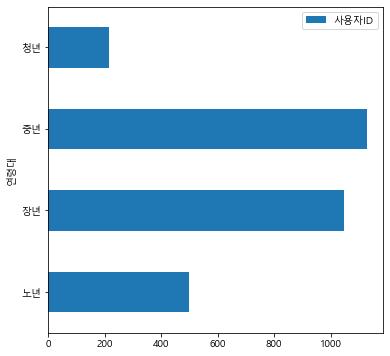

In [191]:
# colors=['yellow','blue','green','red']
groups.plot(kind='barh',grid=False,figsize=(6,6))

17. 시간의 흐름에 따른 카드 개설 인원의 추이를 확인할 수 있는 아래와 같은 그래프를 표현하시오.


![그래프](문제17.png)

In [181]:
groups = fin_data.groupby('개설년월')[['사용자ID']].count()
groups

,사용자ID
개설년월,
199605,25
199611,2
199701,25
199706,14
199806,25
...,...
201804,18
201807,6
201808,5


([<matplotlib.axis.XTick at 0x287fe651d30>,
 <a list of 5 Text major ticklabel objects>)

([<matplotlib.axis.YTick at 0x28780b465e0>,
 <a list of 6 Text major ticklabel objects>)

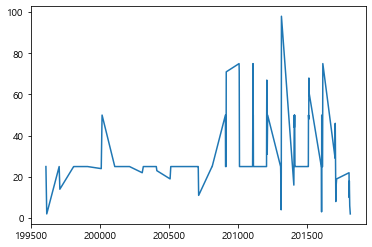

In [182]:
x=[199500,200000,200500,201000,201500]
y=[0,20,40,60,80,100]
plt.figure(figsize=(10,6))
plt.plot(groups)
plt.xticks(x)
plt.yticks(y)
plt.show()

18. fin_data df를 이용하여 각 연대별 발급건수를 표현하는 피봇테이블을 생성하고 해당 테이블을 사용하여 각 연대별 신용카드 발급 추이를 나타내는 아래와 같은 그래프를 그리시오


![그래프](문제18.png)

19. 신용카드의 각 연도별 발급건수를 계산하고 연도별 오름차순으로 정렬하시오.
- 결과를 변수에 저장하시오


In [179]:
groups = fin_data.groupby('개설연대')[['사용자ID']].count()
groups

,사용자ID
개설연대,
1990년대,141
2000년대,770
2010년대,1981


20. 19번에서 저장한 변수의 데이터를 활용하여 연도별 
- 개설건수에 대하여 아래와 같은 시계열 그래프로 표현하시오.


<Figure size 432x432 with 0 Axes>

([<matplotlib.axis.YTick at 0x287fe644b50>,
 <a list of 8 Text major ticklabel objects>)

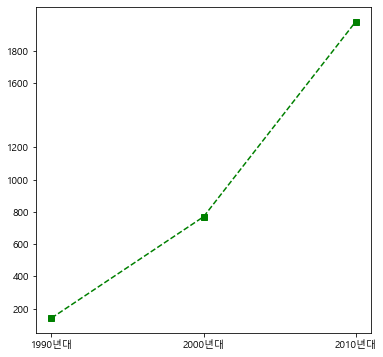

In [178]:
y=[200,400,600,800,1000,1200,1600,1800]
plt.figure(figsize=(10,10))
plt.plot(groups,color='green',linestyle='dashed',marker='s')
plt.yticks(y)
plt.show()

![그래프](문제20.png)

21. 성별,연령대로 그룹화하여 카드 발급 건수를 표현하는 피봇테이블을 작성하고 변수에 저장하시오


In [199]:
groups = fin_data.groupby(['성별','연령대'])[['사용자ID']].count()
groups

사용자ID
성별 연령대       
F  노년     429
   장년     736
   중년     449
   청년     142
M  노년      71
   장년     311
   중년     679
   청년      75

22. 21번에서 저장한 변수를 이용하여 아래와 같은 그래프를 작성하시오.

![그래프](문제21.png)

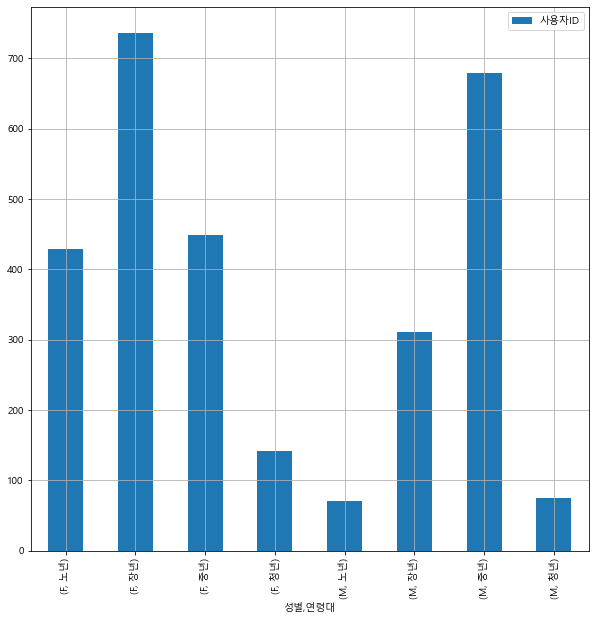

In [200]:
# x = ['남','여']
# y = [0,100,200,300,400,500,600,700]
groups.plot(kind='bar',grid=True,figsize=(10,10))
# plt.xticks(x,y,rotation='horizontal')